<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto5.NYC-bikes/blob/main/NycBikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **City Bike trips**


[Data Set](https:///content/citi_bike_trips.csv)



In [43]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/citi_bike_trips.csv')

# Verificar que el archivo se cargó correctamente
print(df.head())


   tripduration             stoptime  start_station_id  \
0           318  2017-10-01 21:01:53              3480   
1          1099  2018-02-19 22:55:52              3489   
2          1396  2017-11-09 17:38:10              3489   
3          1181  2018-05-17 18:16:34              3489   
4           616  2017-09-17 19:10:21              3489   

       start_station_name  start_station_latitude  start_station_longitude  \
0            WS Don't Use                  0.0000                 0.000000   
1  Gold St & Frankfort St                 40.7107               -74.003541   
2  Gold St & Frankfort St                 40.7107               -74.003541   
3  Gold St & Frankfort St                 40.7107               -74.003541   
4  Gold St & Frankfort St                 40.7107               -74.003541   

   end_station_id               end_station_name  end_station_latitude  \
0            3214               Essex Light Rail             40.712774   
1             363                 

In [21]:
# Verificar valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

print("Valores nulos por columna:")
print(nulos_por_columna)


Valores nulos por columna:
tripduration                   0
stoptime                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bikeid                         0
usertype                       0
birth_year                  4639
gender                         0
customer_plan              50000
dtype: int64


In [22]:
# Filtrar filas que tienen valores nulos
filas_con_nulos = df[df.isnull().any(axis=1)]

print("Filas con valores nulos:")
print(filas_con_nulos)


Filas con valores nulos:
       tripduration             stoptime  start_station_id  \
0               318  2017-10-01 21:01:53              3480   
1              1099  2018-02-19 22:55:52              3489   
2              1396  2017-11-09 17:38:10              3489   
3              1181  2018-05-17 18:16:34              3489   
4               616  2017-09-17 19:10:21              3489   
...             ...                  ...               ...   
49995           741  2017-11-20 15:43:41              3256   
49996          1014  2018-03-30 15:13:00              3256   
49997          1143   2016-09-17 0:42:28              3256   
49998          1193  2017-04-13 17:13:21              3256   
49999           982  2017-07-08 18:37:15              3256   

                start_station_name  start_station_latitude  \
0                     WS Don't Use                0.000000   
1           Gold St & Frankfort St               40.710700   
2           Gold St & Frankfort St          

In [23]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()

print("¿Existen filas duplicadas?:", duplicados.any())

# Contar cuántas filas duplicadas hay
cantidad_duplicados = duplicados.sum()

print("Cantidad de filas duplicadas:", cantidad_duplicados)


¿Existen filas duplicadas?: False
Cantidad de filas duplicadas: 0


In [24]:
# Filtrar las filas duplicadas
filas_duplicadas = df[df.duplicated()]

print("Filas duplicadas:")
print(filas_duplicadas)


Filas duplicadas:
Empty DataFrame
Columns: [tripduration, stoptime, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, customer_plan]
Index: []


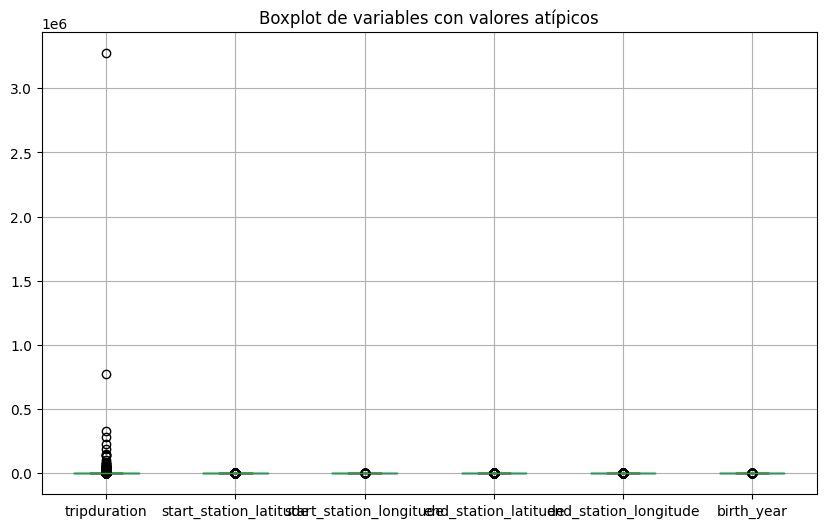

Valores Atípicos detectados:
       tripduration  start_station_latitude  start_station_longitude  \
26             2238                     NaN                      NaN   
114            2112                     NaN                      NaN   
115            2619                     NaN                      NaN   
116            2550                     NaN                      NaN   
144            3517                     NaN                      NaN   
...             ...                     ...                      ...   
49915          3517                     NaN                      NaN   
49938          3689                     NaN                      NaN   
49952          5638                     NaN                      NaN   
49989         13842                     NaN                      NaN   
49990          4037                     NaN                      NaN   

       end_station_latitude  end_station_longitude  birth_year  
26                      NaN              

In [25]:
#OUTLIERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('/content/citi_bike_trips.csv')

#Revision de columnas numerics
columns_to_check = ['tripduration', 'start_station_latitude', 'start_station_longitude',
                    'end_station_latitude', 'end_station_longitude', 'birth_year']

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    # Calcular cuartiles y el rango intercuartílico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos
    outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de variables con valores atípicos')
plt.show()

# Mostrar el DataFrame de valores atípicos
outliers

#Guardar Outliers en un CSV
outliers.to_csv('/content/outliers.csv', index=False)

#Imprimir valoresa tipicos
print("Valores Atípicos detectados:")
print(outliers)


In [26]:
df.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,customer_plan
count,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,45361.000000,0.0
mean,9.880736e+02,2714.45928,40.742535,-73.982115,1337.175080,40.741723,-73.983962,23630.357380,1978.215449,NaN
std,1.534757e+04,1171.04762,0.186269,0.331283,1330.040611,0.039289,0.017279,5570.565232,11.930613,NaN
min,6.000000e+01,151.00000,0.000000,-74.025353,72.000000,40.646538,-74.036486,14529.000000,1885.000000,NaN
25%,3.860000e+02,3078.00000,40.727714,-73.995168,377.000000,40.726060,-73.995299,18579.000000,1969.000000,NaN
50%,6.280000e+02,3236.00000,40.743116,-73.985624,490.000000,40.742754,-73.986724,23882.500000,1981.000000,NaN
75%,1.062000e+03,3427.00000,40.758985,-73.972095,3136.000000,40.759711,-73.974987,28340.000000,1988.000000,NaN
max,3.273964e+06,3686.00000,45.505851,0.000000,3686.000000,45.505851,-73.569109,33671.000000,2002.000000,NaN


Para 'tripduration':
Límite inferior: -628.0 segundos
Límite superior: 2076.0 segundos



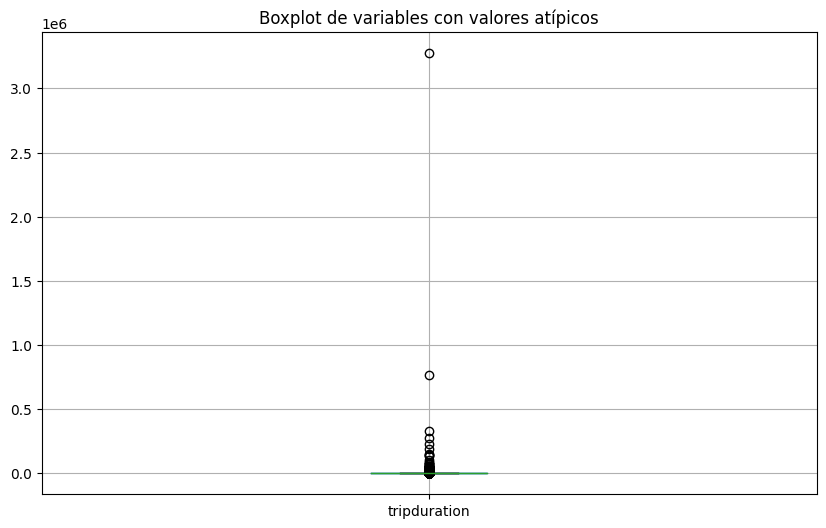

Cantidad de valores atípicos detectados: 2311
Valores Atípicos detectados:
       tripduration
26             2238
114            2112
115            2619
116            2550
144            3517
...             ...
49915          3517
49938          3689
49952          5638
49989         13842
49990          4037

[2311 rows x 1 columns]


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/citi_bike_trips.csv')

#Revisar la variable
columns_to_check = ['tripduration']

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    # Calcular cuartiles y el rango intercuartílico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos
    outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

      # Imprimir los límites para los valores atípicos
    print(f"Para '{column}':")
    print(f"Límite inferior: {lower_bound} segundos")
    print(f"Límite superior: {upper_bound} segundos\n")

# Contar el número de valores atípicos detectados
outlier_count = outliers.count().sum()

# Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de variables con valores atípicos')
plt.show()

# Mostrar el DataFrame de valores atípicos
outliers

# Mostrar la cantidad de valores atípicos detectados
print(f"Cantidad de valores atípicos detectados: {outlier_count}")

#Imprimir valores atipicos
print("Valores Atípicos detectados:")
print(outliers)


In [28]:
#Convertir Tripduration a HH:MM:SS
import pandas as pd

#Asignar df y convertir segundos a hh:mm:ss
df['tripduration_formatted'] = pd.to_datetime(df['tripduration'], unit='s').dt.strftime('%H:%M:%S')

# Ordenar por tripduration de mayor a menor
df.sort_values(by='tripduration', ascending=False, inplace=True)

# Guardar el DataFrame en un archivo CSV
df.to_csv('sorted_bike_trips.csv', index=False)

df.head()


,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,tripduration_formatted
11278,3273964,2018-01-30 8:33:49,3427,Lafayette St & Jersey St,40.724305,-73.996010,3042,Fulton St & Utica Ave,40.679427,-73.929891,17401,Subscriber,1963.0,male,NaN,21:26:04
14350,768912,2017-12-13 15:24:52,3469,India St & West St,40.731814,-73.959950,3432,NYCBS Depot - GOW,40.669060,-73.994637,31021,Subscriber,1989.0,male,NaN,21:35:12
44159,327156,2017-05-24 15:39:50,151,Cleveland Pl & Spring St,40.722104,-73.997249,248,Laight St & Hudson St,40.721854,-74.007718,21421,Customer,NaN,unknown,NaN,18:52:36
9854,278006,2017-10-31 22:45:40,3466,W 45 St & 6 Ave,40.756687,-73.982577,3370,E 78 St & 2 Ave,40.772797,-73.955778,18191,Customer,NaN,unknown,NaN,05:13:26
43504,227860,2015-11-16 2:19:44,151,Cleveland Pl & Spring St,40.722104,-73.997249,3086,Graham Ave & Conselyea St,40.715143,-73.944507,21205,Customer,NaN,unknown,NaN,15:17:40


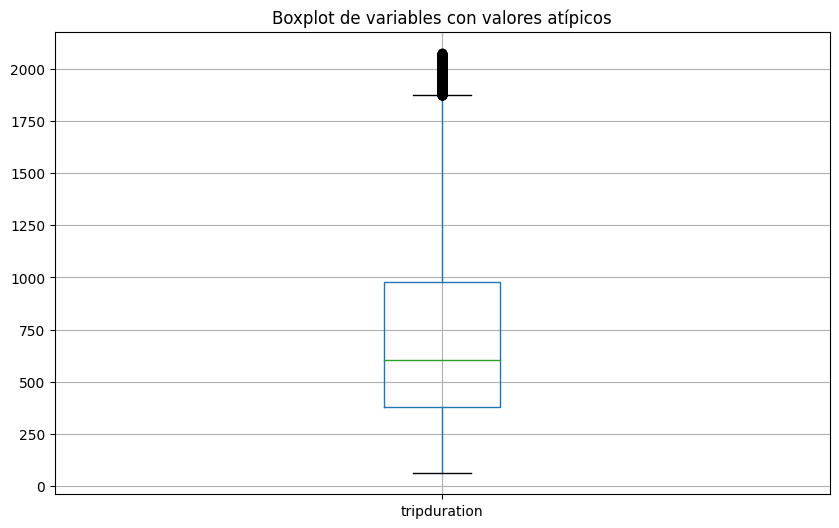

Archivo guardado correctamente en /content/cleaned_bike_trips.csv


,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,tripduration_formatted
0,318,2017-10-01 21:01:53,3480,WS Don't Use,0.0000,0.000000,3214,Essex Light Rail,40.712774,-74.036486,31698,Subscriber,1989.0,male,00:05:18
1,1099,2018-02-19 22:55:52,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,30387,Subscriber,1987.0,male,00:18:19
2,1396,2017-11-09 17:38:10,3489,Gold St & Frankfort St,40.7107,-74.003541,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,27094,Subscriber,1983.0,male,00:23:16
3,1181,2018-05-17 18:16:34,3489,Gold St & Frankfort St,40.7107,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,21360,Subscriber,1991.0,female,00:19:41
4,616,2017-09-17 19:10:21,3489,Gold St & Frankfort St,40.7107,-74.003541,257,Lispenard St & Broadway,40.719392,-74.002472,18785,Subscriber,1998.0,female,00:10:16


In [29]:
#limpieza del Dataframe
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('/content/citi_bike_trips.csv')

# Crear la columna 'tripduration_formatted' convirtiendo segundos a hh:mm:ss
df['tripduration_formatted'] = pd.to_datetime(df['tripduration'], unit='s').dt.strftime('%H:%M:%S')

# Definir la columna que queremos revisar para outliers
columns_to_check = ['tripduration']

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    # Calcular cuartiles y el rango intercuartílico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores que no son atípicos y conservarlos
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  # Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de variables con valores atípicos')
plt.show()

# Reemplazar los valores nulos en 'birth_year' con cero
df['birth_year'].fillna(0, inplace=True)

# Eliminar la columna 'customer_plan'
df.drop(columns=['customer_plan'], inplace=True)

# Guardar el DataFrame resultante en un nuevo archivo CSV
output_file = '/content/cleaned_bike_trips.csv'
df.to_csv(output_file, index=False)

# Verificar si el archivo se ha guardado correctamente
if os.path.exists(output_file):
    print(f"Archivo guardado correctamente en {output_file}")
else:
    print("Error: No se pudo guardar el archivo.")

# Mostrar las primeras filas del DataFrame resultante
df.head()


In [30]:
#Trabajar con el nuevo archivo limpio
import pandas as pd
# Cargar el archivo CSV
df = pd.read_csv('/content/cleaned_bike_trips.csv')

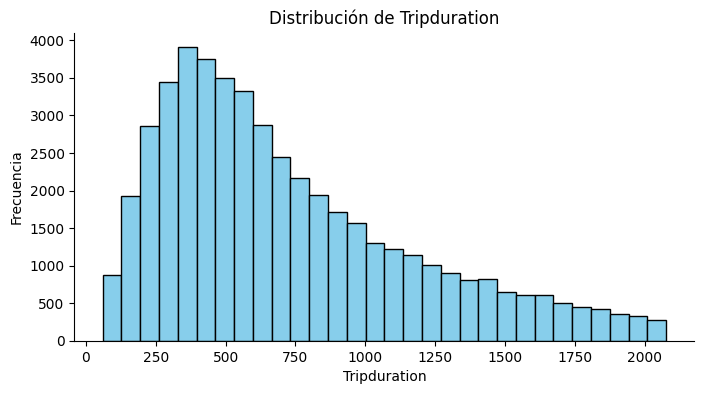

In [41]:
import pandas as pd
from matplotlib import pyplot as plt

# Visualizar distribución de tripduration
plt.figure(figsize=(8, 4))
df['tripduration'].plot(kind='hist', bins=30, title='Distribución de Tripduration', color='skyblue', edgecolor='black')
plt.xlabel('Tripduration')
plt.ylabel('Frecuencia')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Interpretación: Esta gráfica de líneas te permite visualizar cómo la duración de los viajes (tripduration) varía a lo largo de lo que sea que esté representado en el eje x. La tendencia indica que hay un punto máximo en la duración de los viajes, después del cual la duración disminuye.

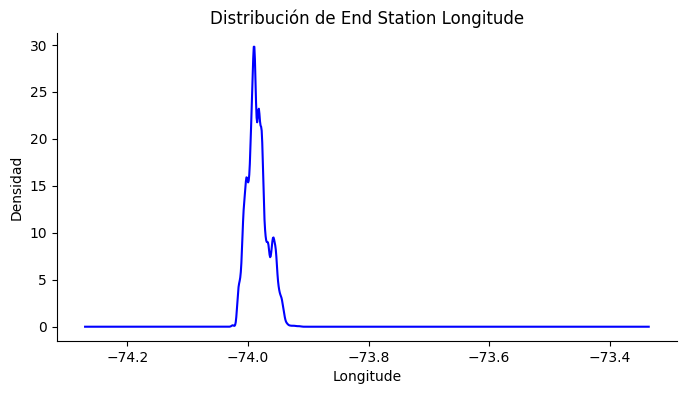

In [45]:
import pandas as pd
from matplotlib import pyplot as plt

# Visualizar distribución de end_station_longitude
plt.figure(figsize=(8, 4))
df['end_station_longitude'].plot(kind='density', title='Distribución de End Station Longitude', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Densidad')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Interpretación: La gráfica muestra que las estaciones finales de los viajes tienen una variabilidad en su longitud, pero de manera más controlada y gradual. Esto es lo que esperarías ver en un conjunto de datos geográficos bien gestionado, donde las ubicaciones están dentro de un rango lógico y no presentan cambios abruptos.

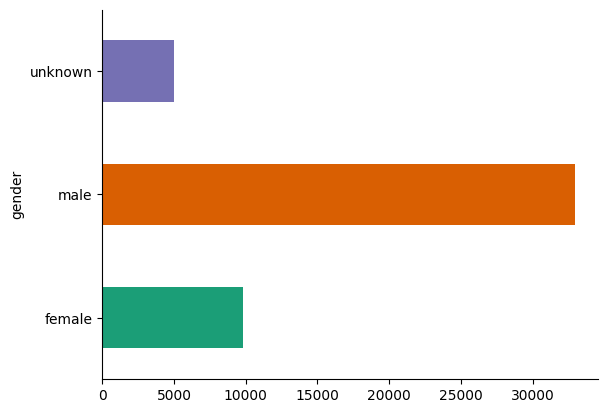

In [38]:
#Distribucion gender
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Interpretación: hay más registros para la categoría "male" que para "female"

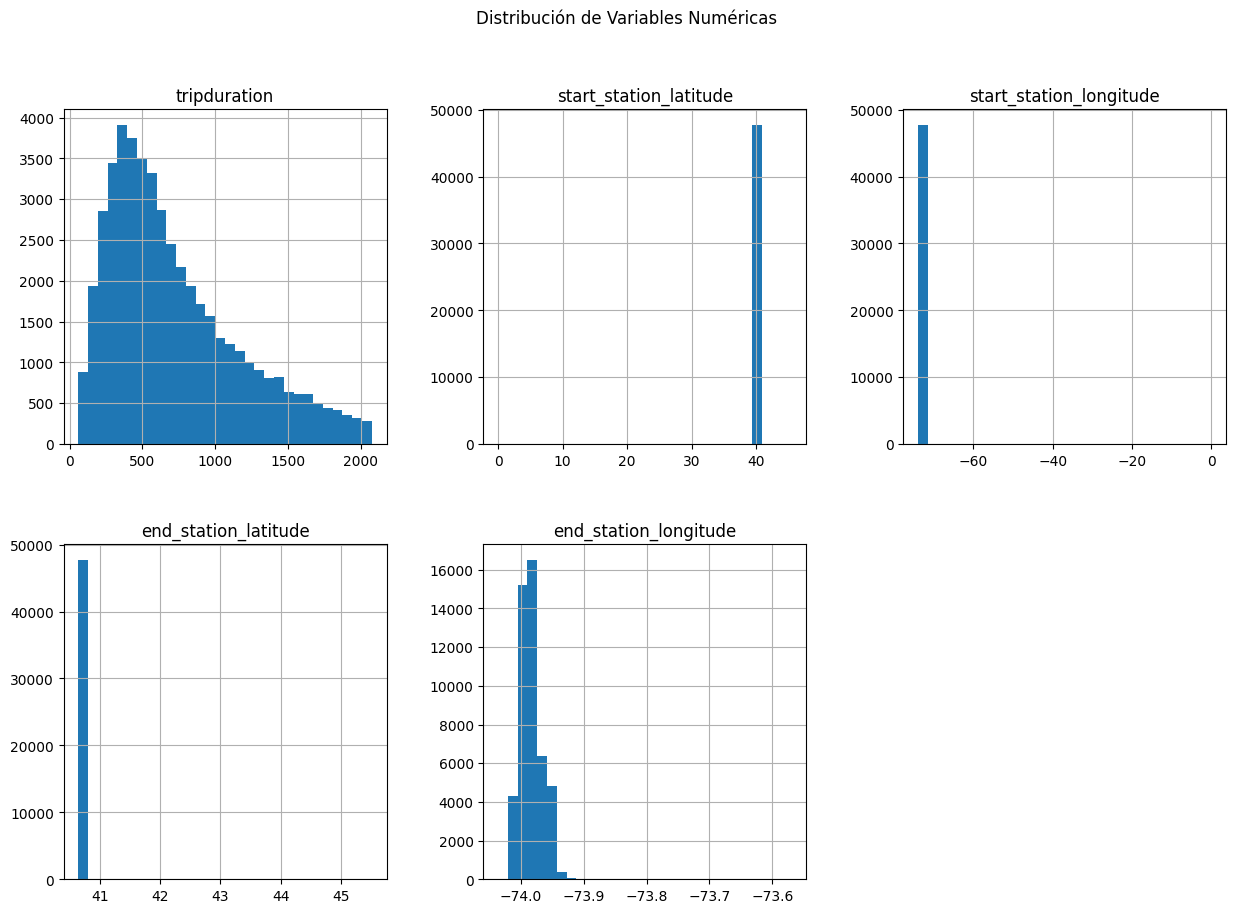

<ipython-input-49-aa8ea677288a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


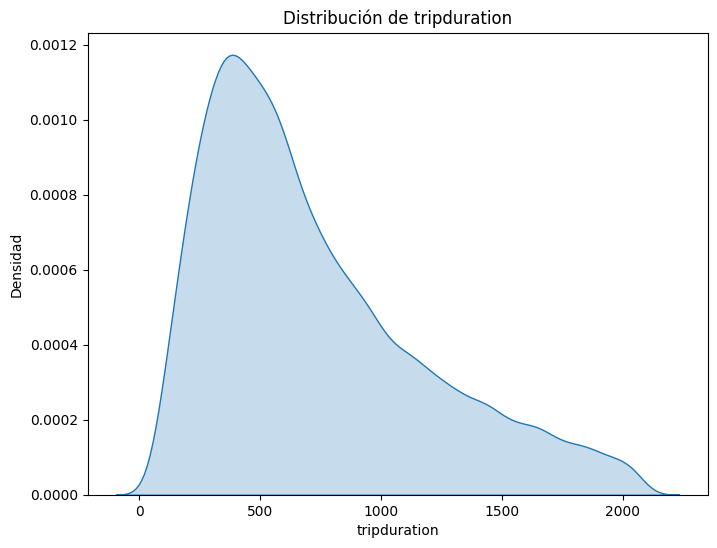

<ipython-input-49-aa8ea677288a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


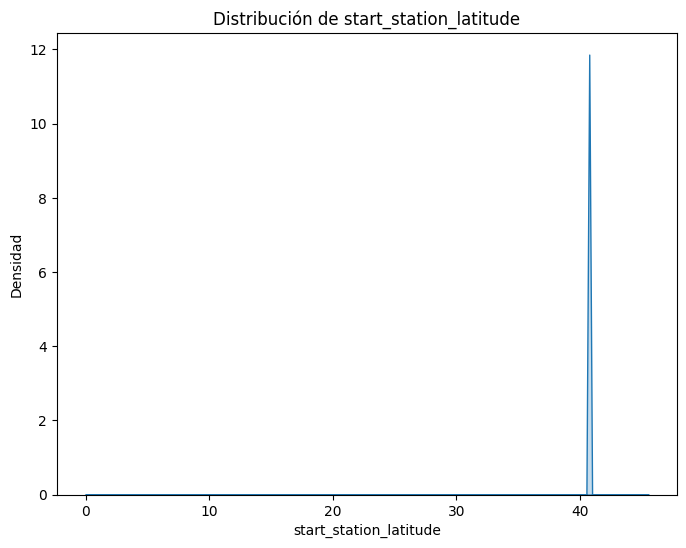

<ipython-input-49-aa8ea677288a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


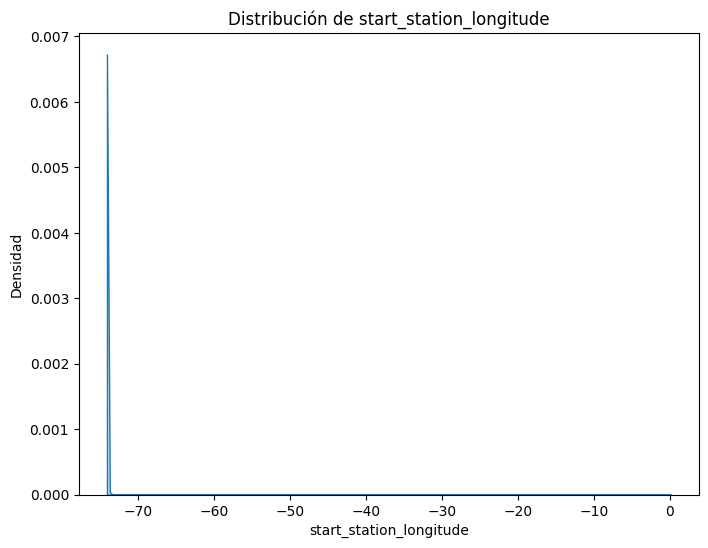

<ipython-input-49-aa8ea677288a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


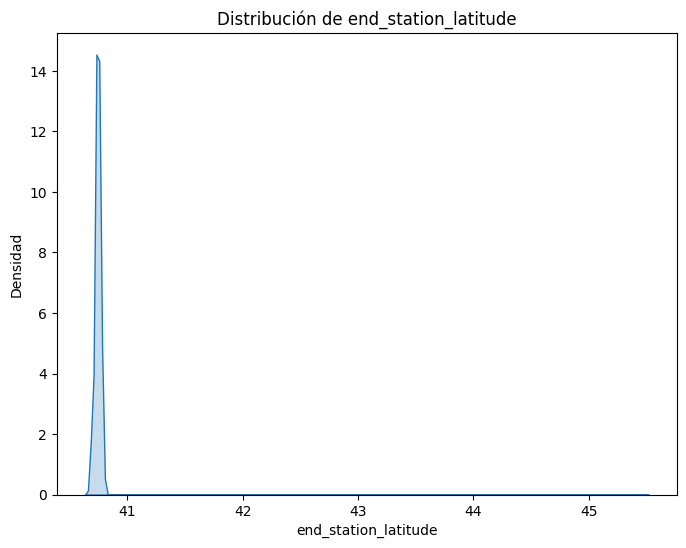

<ipython-input-49-aa8ea677288a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


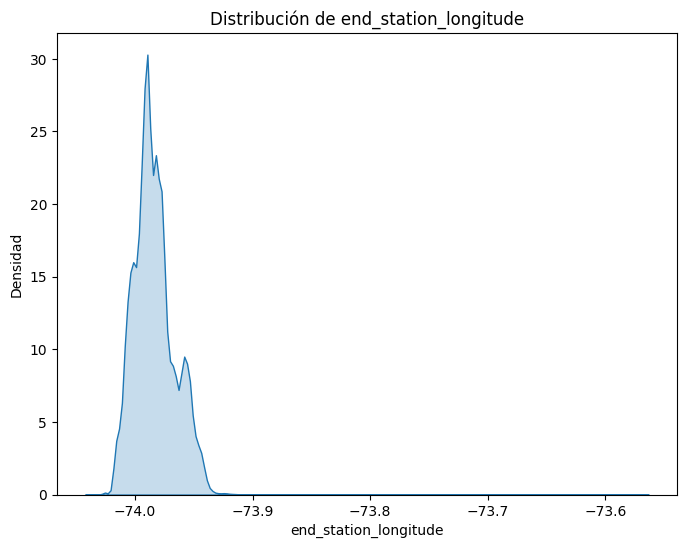

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('/content/cleaned_bike_trips.csv')

# Columnas numéricas a visualizar
numerical_columns = ['tripduration', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

# Crear histogramas
df[numerical_columns].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

#Gráficos de densidad para ver las variables con distribución leve
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.show()


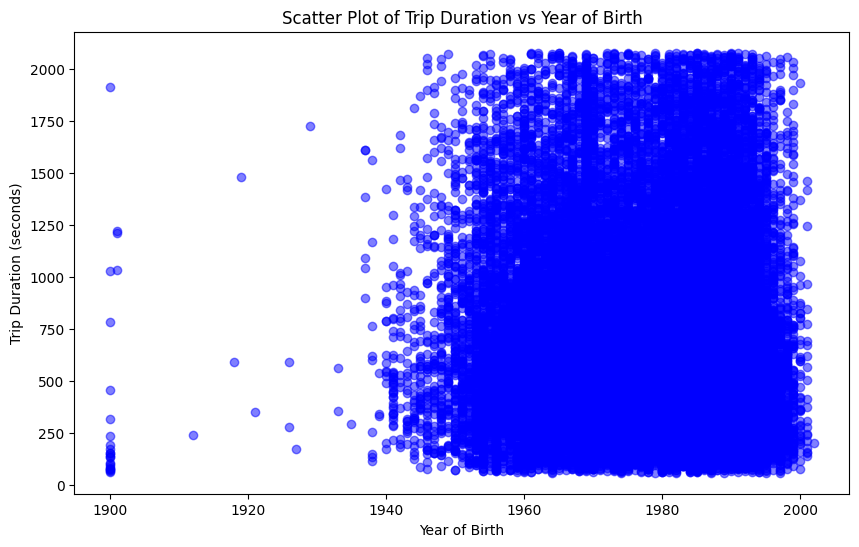

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('/content/cleaned_bike_trips.csv')

# Filtrar para incluir solo años de nacimiento válidos
df = df[(df['birth_year'] >= 1900) & (df['birth_year'] <= 2023)]

# Generar la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['birth_year'], df['tripduration'], alpha=0.5, c='blue')

# Agregar etiquetas y título
plt.xlabel('Year of Birth')
plt.ylabel('Trip Duration (seconds)')
plt.title('Scatter Plot of Trip Duration vs Year of Birth')

# Mostrar la gráfica
plt.show()


tripduration vs birth_year: La gráfica muestra que la mayoría de los usuarios del sistema de bicicletas nacieron entre 1950 y 2000. Esto sugiere que los usuarios del sistema tienden a ser adultos en su mayoría, con pocos usuarios mayores de 70 años o menores de 20. No hay una relación clara entre el año de nacimiento y la duración del viaje. La dispersión de los puntos muestra que los usuarios de diferentes edades tienden a realizar viajes con duraciones variadas, sin un patrón obvio.

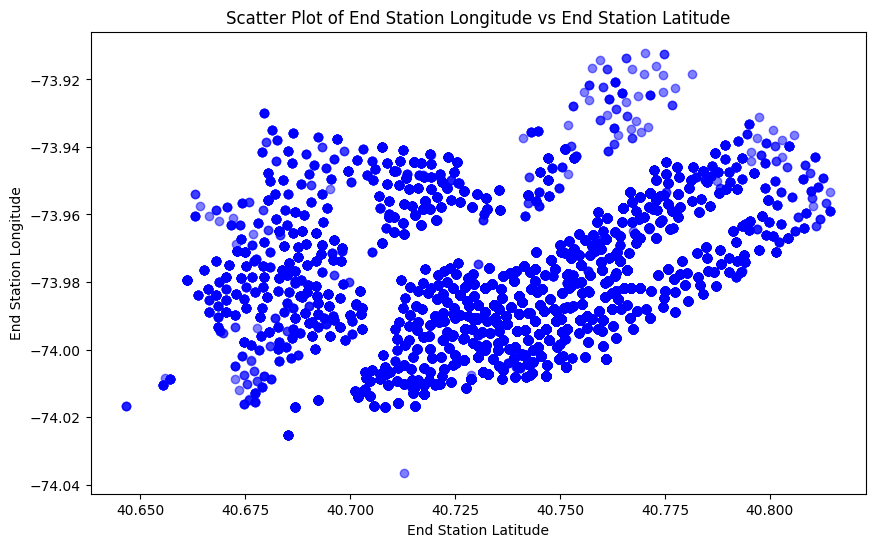

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar datos para que solo incluyan valores dentro de un rango razonable para NYC
df_filtered = df[(df['end_station_latitude'] >= 40.5) & (df['end_station_latitude'] <= 41) &
                 (df['end_station_longitude'] >= -74.25) & (df['end_station_longitude'] <= -73.7)]

# Generar la gráfica de dispersión con los datos filtrados
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['end_station_latitude'], df_filtered['end_station_longitude'], alpha=0.5, c='blue')

# Agregar etiquetas y título
plt.xlabel('End Station Latitude')
plt.ylabel('End Station Longitude')
plt.title('Scatter Plot of End Station Longitude vs End Station Latitude')

# Mostrar la gráfica
plt.show()


Interpretación: Esta gráfica muestra que las estaciones de destino en tu conjunto de datos están muy próximas entre sí en una área geográfica pequeña, probablemente en la ciudad de Nueva York. La distribución lineal de los puntos puede indicar que las estaciones están alineadas a lo largo de una calle o avenida.

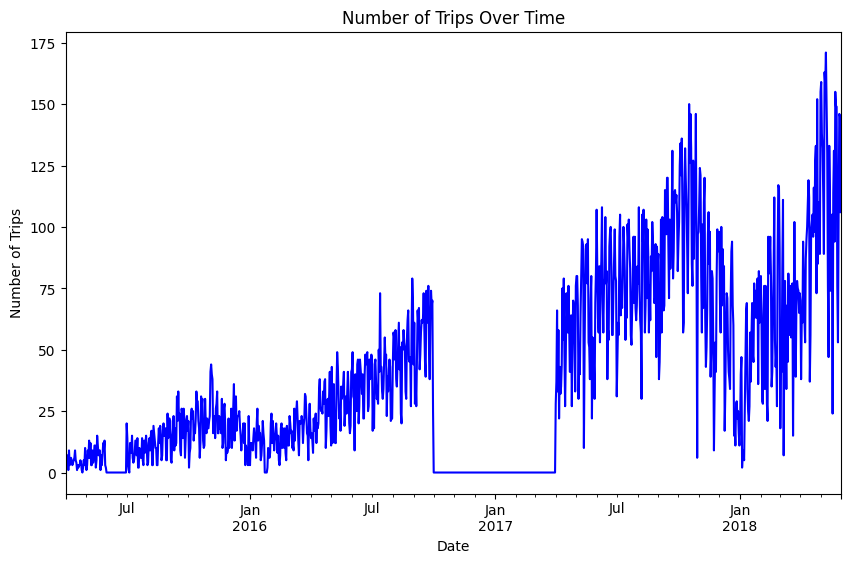

In [59]:
#Comportamiento atravez del tiempo
import matplotlib.pyplot as plt
import pandas as pd

# Corroborar 'stoptime' esté en formato datetime
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Agrupar los datos por día y contar el número de viajes por día
trips_per_day = df.resample('D', on='stoptime').size()

# Generar la gráfica de líneas
plt.figure(figsize=(10, 6))
trips_per_day.plot(kind='line', color='blue')

# Etiquetas y título
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Over Time')

# Mostrar la gráfica
plt.show()


Interpretación: La gráfica muestra un aumento general en el número de viajes a lo largo del tiempo, con varias fluctuaciones.

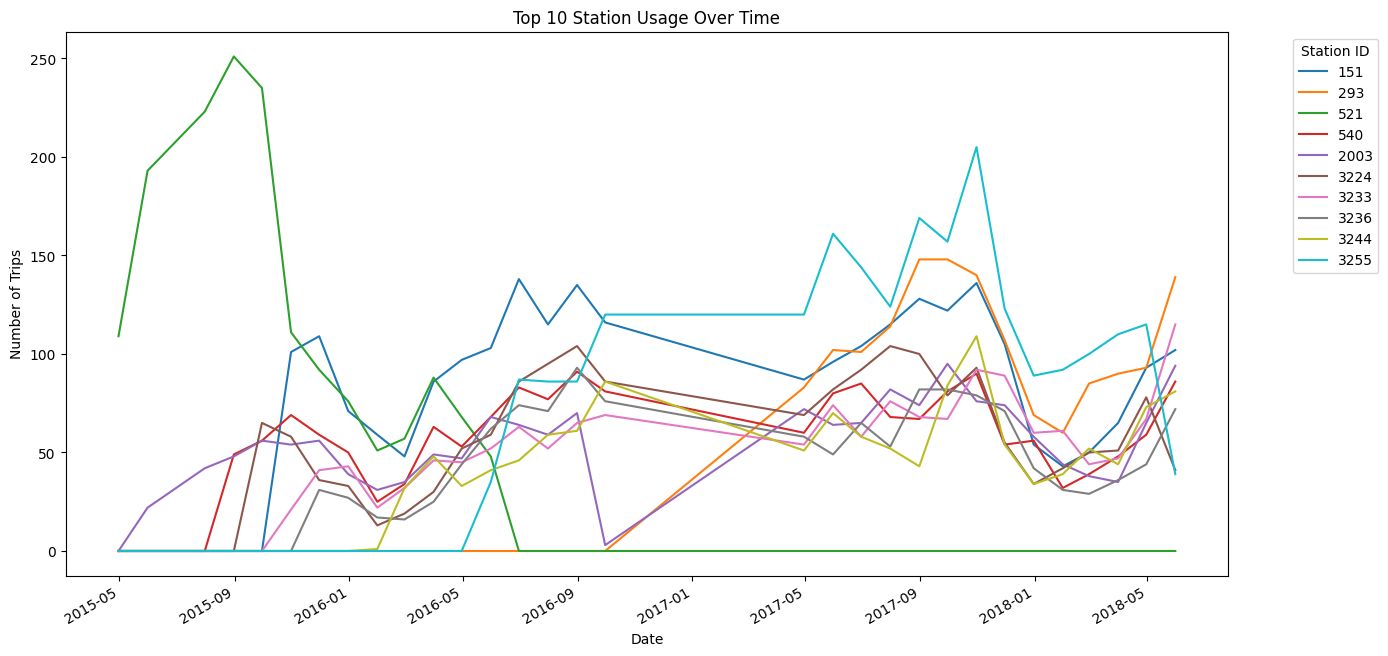

In [63]:
#Visualizar atravez del tiempo
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'stoptime' a datetime
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Contar los usos por estación a lo largo del tiempo y mostrar las 10 estaciones más utilizadas
top_stations = df['start_station_id'].value_counts().nlargest(10).index
df_top_stations = df[df['start_station_id'].isin(top_stations)]

station_usage_over_time = df_top_stations.resample('M', on='stoptime')['start_station_id'].value_counts().unstack().fillna(0)
station_usage_over_time.plot(kind='line', figsize=(15, 8), title='Top 10 Station Usage Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretación:
* Popularidad Fluctuante: La popularidad de las estaciones cambia con el tiempo, y algunas estaciones parecen ganar o perder usuarios de manera bastante significativa.
* Patrones Estacionales: El uso de las estaciones tiende a aumentar en ciertos períodos del año (probablemente en primavera y verano), lo cual es típico en este tipo de servicios.
* Diferenciación entre Estaciones: Mientras algunas estaciones como la 151 fueron extremadamente populares al principio, otras parecen haber ganado tracción con el tiempo, lo que puede reflejar cambios en el entorno urbano o en las rutas preferidas por los usuarios.

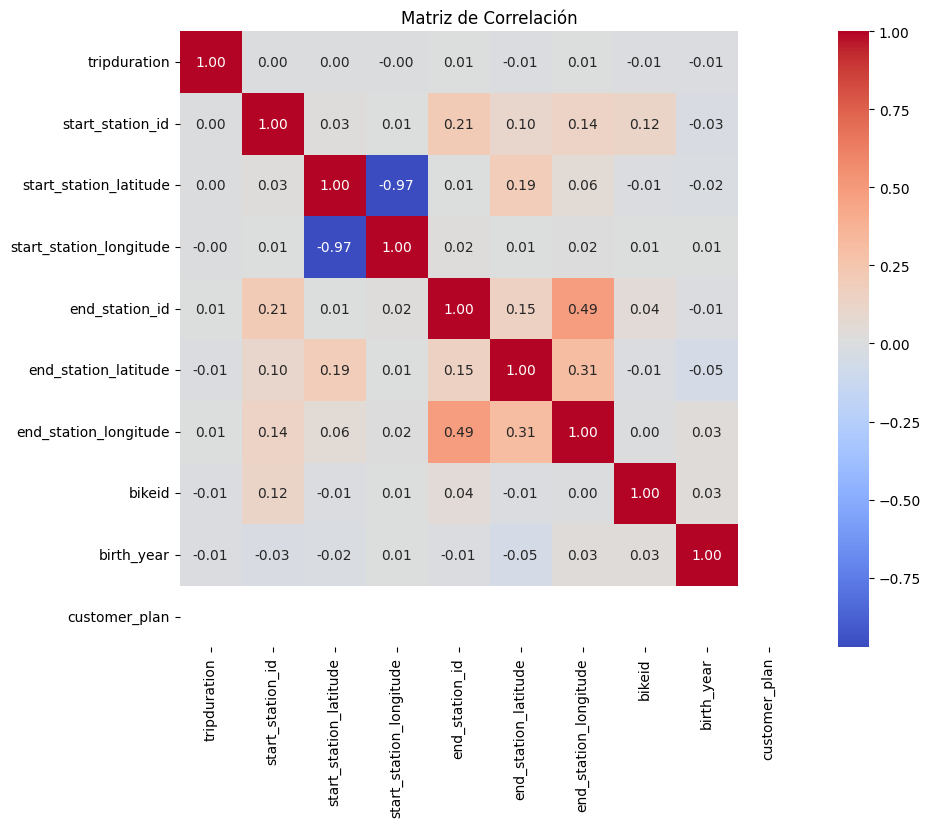

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('/content/citi_bike_trips.csv')

# Seleccionar las columnas numéricas que deseas analizar
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Crear una visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()


# **City Bike Stations**

[Data Set](https:///content/citybike-stations.csv)

In [68]:
# Cargar el archivo CSV
df = pd.read_csv('/content/citybike-stations.csv')

In [69]:
# Verificar valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

print("Valores nulos por columna:")
print(nulos_por_columna)


Valores nulos por columna:
station_id                   0
name                         0
short_name                   0
latitude                     0
longitude                    0
region_id                    0
rental_methods               0
capacity                     0
eightd_has_key_dispenser     0
num_bikes_available          0
num_bikes_disabled           0
num_docks_available          0
num_docks_disabled           0
is_installed                 0
is_renting                   0
is_returning                 0
eightd_has_available_keys    0
last_reported                0
dtype: int64


In [70]:
# Filtrar filas que tienen valores nulos
filas_con_nulos = df[df.isnull().any(axis=1)]

print("Filas con valores nulos:")
print(filas_con_nulos)


Filas con valores nulos:
Empty DataFrame
Columns: [station_id, name, short_name, latitude, longitude, region_id, rental_methods, capacity, eightd_has_key_dispenser, num_bikes_available, num_bikes_disabled, num_docks_available, num_docks_disabled, is_installed, is_renting, is_returning, eightd_has_available_keys, last_reported]
Index: []


In [74]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()

print("¿Existen filas duplicadas?:", duplicados.any())

# Contar cuántas filas duplicadas hay
cantidad_duplicados = duplicados.sum()

print("Cantidad de filas duplicadas:", cantidad_duplicados)


¿Existen filas duplicadas?: False
Cantidad de filas duplicadas: 0


In [71]:
# Filtrar las filas duplicadas
filas_duplicadas = df[df.duplicated()]

print("Filas duplicadas:")
print(filas_duplicadas)


Filas duplicadas:
Empty DataFrame
Columns: [station_id, name, short_name, latitude, longitude, region_id, rental_methods, capacity, eightd_has_key_dispenser, num_bikes_available, num_bikes_disabled, num_docks_available, num_docks_disabled, is_installed, is_renting, is_returning, eightd_has_available_keys, last_reported]
Index: []


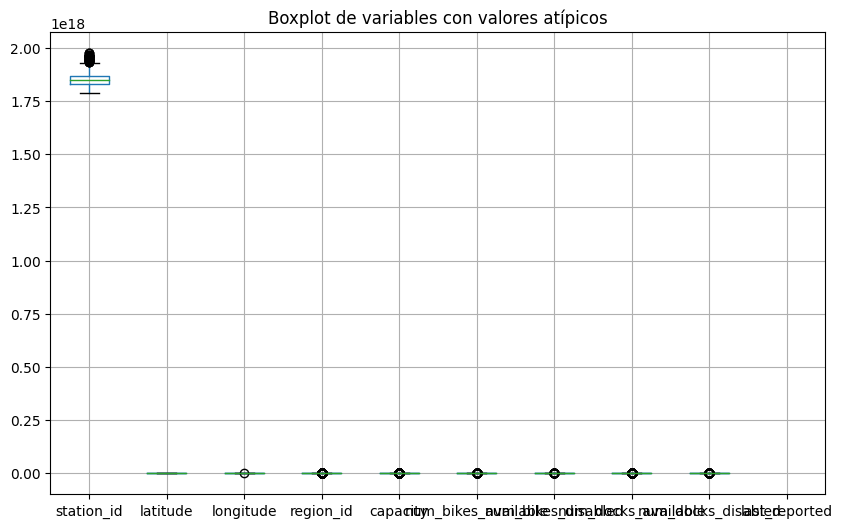

Valores Atípicos detectados:
        station_id  latitude  longitude  region_id  capacity  \
183   1.960021e+18       NaN        NaN          0     117.0   
280   1.951008e+18       NaN        NaN          0       NaN   
534   1.947314e+18       NaN        NaN          0       NaN   
583   1.960021e+18       NaN        NaN          0       NaN   
881   1.954779e+18       NaN        NaN          0       NaN   
893   1.931759e+18       NaN        NaN          0       NaN   
997   1.932127e+18       NaN        NaN          0       NaN   
1062  1.958458e+18       NaN        NaN          0       NaN   
1161  1.945126e+18       NaN        NaN          0       NaN   
1185  1.945126e+18       NaN        NaN          0       NaN   
1211  1.945126e+18       NaN        NaN          0       NaN   
1264  1.950648e+18       NaN        NaN          0       NaN   
1348  1.947002e+18       NaN        NaN          0       NaN   
1354  1.962547e+18       NaN        NaN          0       NaN   
1356  1.945

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('/content/citybike-stations.csv')

# Columnas a revisar
columns_to_check = ['station_id', 'latitude', 'longitude', 'region_id', 'capacity',
                    'num_bikes_available', 'num_bikes_disabled', 'num_docks_available',
                    'num_docks_disabled', 'last_reported']

# Corroborar que las columnas sean numéricas
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    if df[column].dtype in ['float64', 'int64']:  # Solo procesar columnas numéricas
        # Calcular cuartiles y el rango intercuartílico
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para detectar valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar los valores atípicos
        outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de variables con valores atípicos')
plt.show()

# Mostrar el DataFrame de valores atípicos
print("Valores Atípicos detectados:")
print(outliers)

# Guardar Outliers en un CSV
outliers.to_csv('/content/outliers.csv', index=False)


In [73]:
df.describe()


,station_id,latitude,longitude,region_id,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported
count,3.920000e+02,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,0.0
mean,1.854513e+18,40.745871,-73.947468,60.504050,31.162916,14.204770,2.019352,14.079658,0.121062,NaN
std,4.155883e+16,0.061040,0.043777,39.256057,17.164393,12.661666,2.966128,14.696094,1.630754,NaN
min,1.786375e+18,40.633385,-74.086701,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.828968e+18,40.699455,-73.981920,71.000000,21.000000,5.000000,0.000000,4.000000,0.000000,NaN
50%,1.848241e+18,40.741758,-73.945142,71.000000,24.000000,12.000000,1.000000,11.000000,0.000000,NaN
75%,1.869754e+18,40.782940,-73.912756,71.000000,35.000000,19.000000,3.000000,18.000000,0.000000,NaN
max,1.975560e+18,40.886300,-73.846720,311.000000,123.000000,111.000000,60.000000,112.000000,60.000000,NaN


Para 'station_id':
Límite inferior: 1.767789214329893e+18
Límite superior: 1.9309321145416727e+18



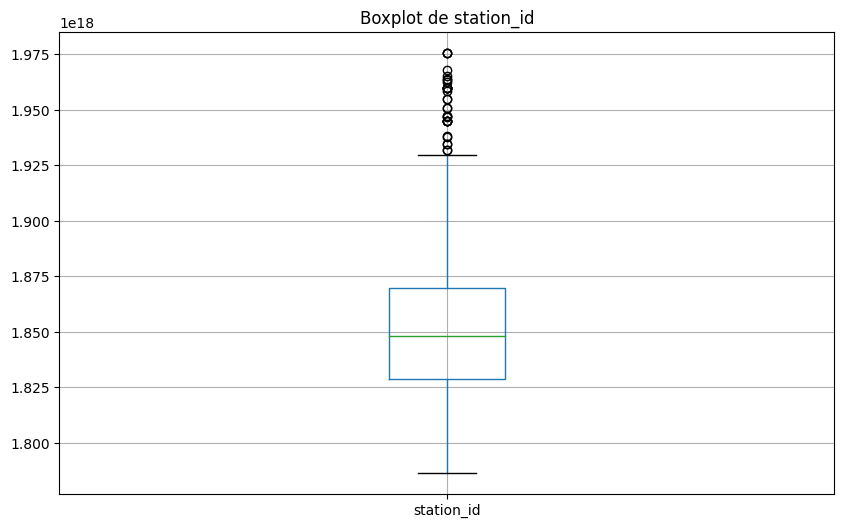

Cantidad de valores atípicos detectados: 33
Valores Atípicos detectados:
        station_id
183   1.960021e+18
280   1.951008e+18
534   1.947314e+18
583   1.960021e+18
881   1.954779e+18
893   1.931759e+18
997   1.932127e+18
1062  1.958458e+18
1161  1.945126e+18
1185  1.945126e+18
1211  1.945126e+18
1264  1.950648e+18
1348  1.947002e+18
1354  1.962547e+18
1356  1.945126e+18
1365  1.960020e+18
1378  1.960021e+18
1379  1.934749e+18
1465  1.934770e+18
1476  1.945126e+18
1646  1.947367e+18
1826  1.938139e+18
1849  1.975560e+18
1857  1.965202e+18
1890  1.937778e+18
1929  1.954807e+18
2109  1.967779e+18
2121  1.960020e+18
2171  1.960021e+18
2174  1.975518e+18
2192  1.963273e+18
2208  1.964062e+18
2216  1.975518e+18


In [75]:
#Visualizar Outliers en station_id
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('/content/citybike-stations.csv')

# Revisar la variable
columns_to_check = ['station_id']

# Corroborar que la columna sea numérica (convertir si es necesario)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    # Calcular cuartiles y el rango intercuartílico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos
    outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimir los límites para los valores atípicos
    print(f"Para '{column}':")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}\n")

# Contar el número de valores atípicos detectados
outlier_count = outliers.count().sum()

# Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de station_id')
plt.show()

# Mostrar la cantidad de valores atípicos detectados
print(f"Cantidad de valores atípicos detectados: {outlier_count}")

# Imprimir valores atípicos detectados
print("Valores Atípicos detectados:")
print(outliers)


In [76]:
#Limpieza del dataframe
import pandas as pd

# Cargar el archivo CSV original
df = pd.read_csv('/content/citybike-stations.csv')

# Completar valores nulos con 0
df.fillna(0, inplace=True)

# Convertir 'last_reported' a formato datetime y coaccionar errores a NaT (Not a Time)
df['last_reported'] = pd.to_datetime(df['last_reported'], errors='coerce')

# Eliminar filas donde 'last_reported' es NaT (fechas inválidas)
df = df[df['last_reported'].notnull()]

# Filtrar fechas que estén fuera de un rango razonable (por ejemplo, después del 2010)
df = df[df['last_reported'] > '2010-01-01']

# Intentar guardar en la carpeta raíz de tu entorno
df.to_csv('/content/cleaned_citybike_stations.csv', index=False)

print("El nuevo DataFrame ha sido guardado como 'cleaned_citybike_stations.csv' en la carpeta raíz.")


El nuevo DataFrame ha sido guardado como 'cleaned_citybike_stations.csv' en la carpeta raíz.


In [ ]:
try:
    df.to_csv('cleaned_citybike_stations.csv', index=False)
    print("Archivo guardado exitosamente.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")


In [ ]:
df.to_csv('cleaned_citybike_stations.csv', index=False)
print("El archivo ha sido guardado en la raíz del entorno.")


In [ ]:
from google.colab import files
files.download('cleaned_citybike_stations.csv')


Para 'station_id':
Límite inferior: 1.767789214329893e+18
Límite superior: 1.9309321145416727e+18



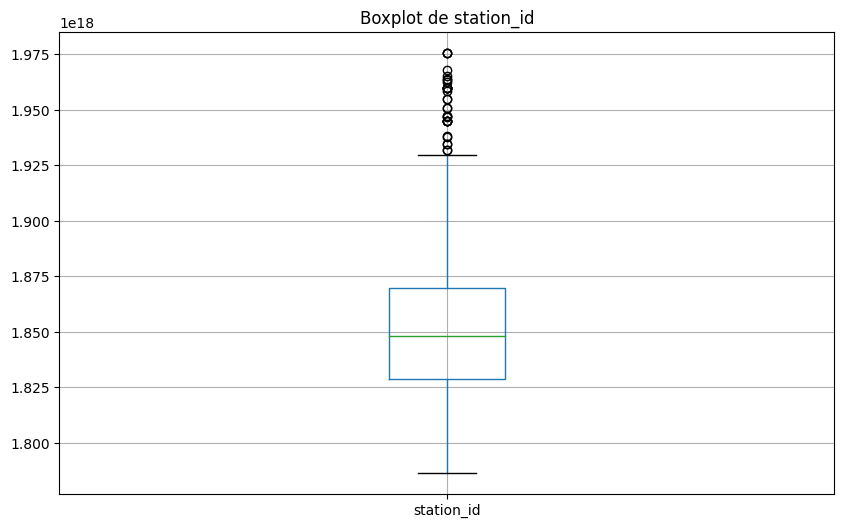

Cantidad de valores atípicos detectados: 33
Valores Atípicos detectados:
        station_id
182   1.960021e+18
279   1.951008e+18
533   1.947314e+18
582   1.960021e+18
880   1.954779e+18
892   1.931759e+18
996   1.932127e+18
1061  1.958458e+18
1160  1.945126e+18
1184  1.945126e+18
1210  1.945126e+18
1263  1.950648e+18
1347  1.947002e+18
1353  1.962547e+18
1355  1.945126e+18
1364  1.960020e+18
1377  1.960021e+18
1378  1.934749e+18
1464  1.934770e+18
1475  1.945126e+18
1645  1.947367e+18
1825  1.938139e+18
1848  1.975560e+18
1856  1.965202e+18
1889  1.937778e+18
1928  1.954807e+18
2108  1.967779e+18
2120  1.960020e+18
2170  1.960021e+18
2173  1.975518e+18
2191  1.963273e+18
2207  1.964062e+18
2215  1.975518e+18


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('/content/cleaned_citybike_stations.csv')

# Revisar la variable
columns_to_check = ['station_id']

# Asegurarse de que la columna sea numérica (convertir si es necesario)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

for column in columns_to_check:
    # Calcular cuartiles y el rango intercuartílico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos
    outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimir los límites para los valores atípicos
    print(f"Para '{column}':")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}\n")

# Contar el número de valores atípicos detectados
outlier_count = outliers.count().sum()

# Visualizar los valores atípicos en un gráfico de caja
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot de station_id')
plt.show()

# Mostrar la cantidad de valores atípicos detectados
print(f"Cantidad de valores atípicos detectados: {outlier_count}")

# Imprimir valores atípicos detectados
print("Valores Atípicos detectados:")
print(outliers)


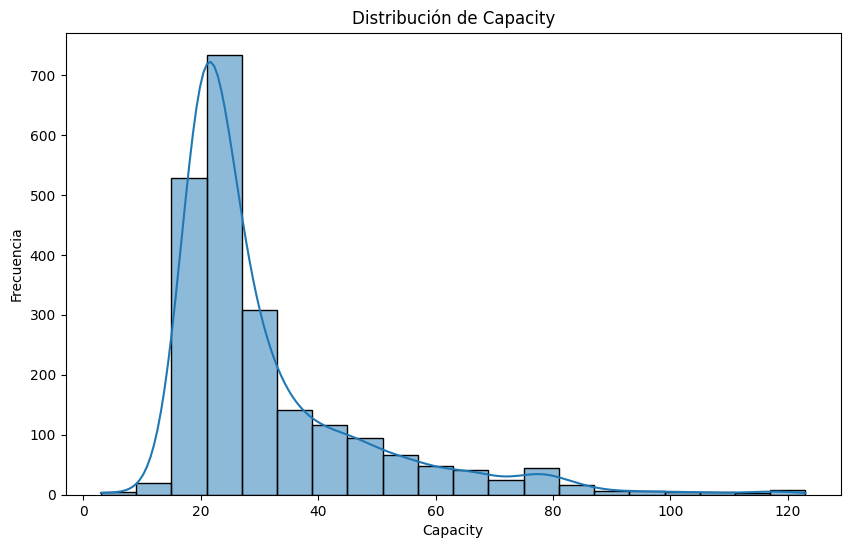

In [78]:
#Distribucion de capacity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['capacity'], kde=True, bins=20)
plt.title('Distribución de Capacity')
plt.xlabel('Capacity')
plt.ylabel('Frecuencia')
plt.show()


Interpretación: La mayoría de las estaciones tienen una capacidad de alrededor de 20, lo que parece ser el estándar. Sin embargo, hay algunas estaciones con capacidades mucho mayores, aunque son raras. Esta distribución sesgada hacia la derecha es común, con la mayoría de los valores concentrados en el rango más bajo y algunos casos excepcionales de valores altos.

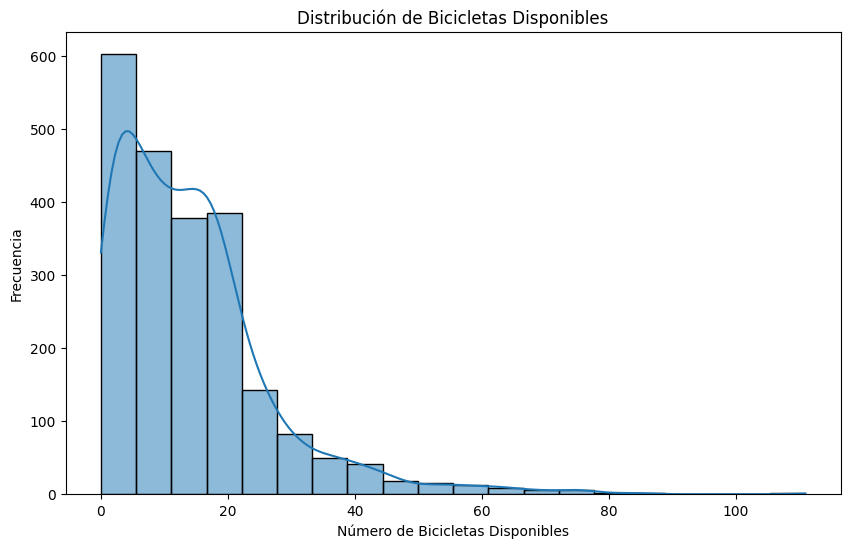

In [79]:
#Distribucion de bikes_available
plt.figure(figsize=(10, 6))
sns.histplot(df['num_bikes_available'], kde=True, bins=20)
plt.title('Distribución de Bicicletas Disponibles')
plt.xlabel('Número de Bicicletas Disponibles')
plt.ylabel('Frecuencia')
plt.show()


Interpretacion: La mayoría de las estaciones de bicicletas en tu dataset muestran una disponibilidad baja, concentrándose entre 0 y 10 bicicletas, lo que sugiere una alta demanda. No obstante, algunas estaciones tienen una mayor disponibilidad, aunque son casos excepcionales.

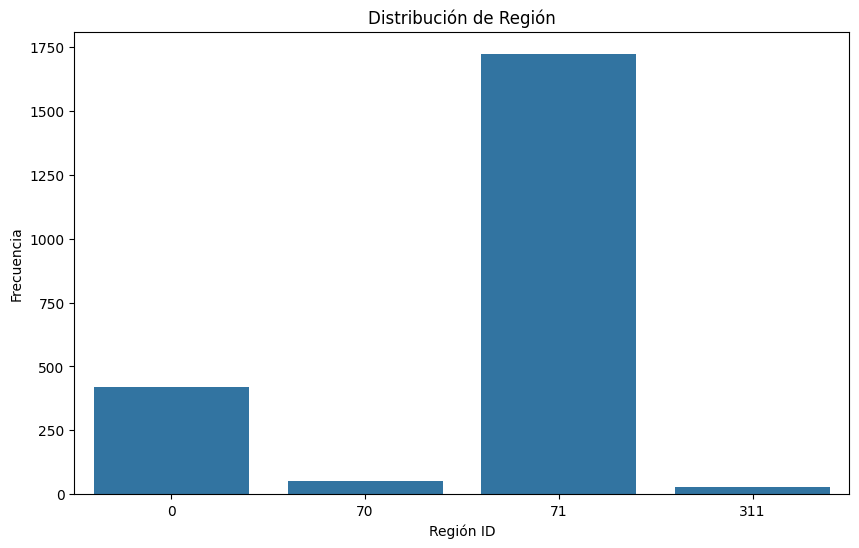

In [80]:
#Distribucion region_id
plt.figure(figsize=(10, 6))
sns.countplot(x='region_id', data=df)
plt.title('Distribución de Región')
plt.xlabel('Región ID')
plt.ylabel('Frecuencia')
plt.show()


Interpretación: la mayoría de las estaciones de bicicletas se encuentran en la Región 71, mientras que las Regiones 0 y 70 tienen muchas menos estaciones.

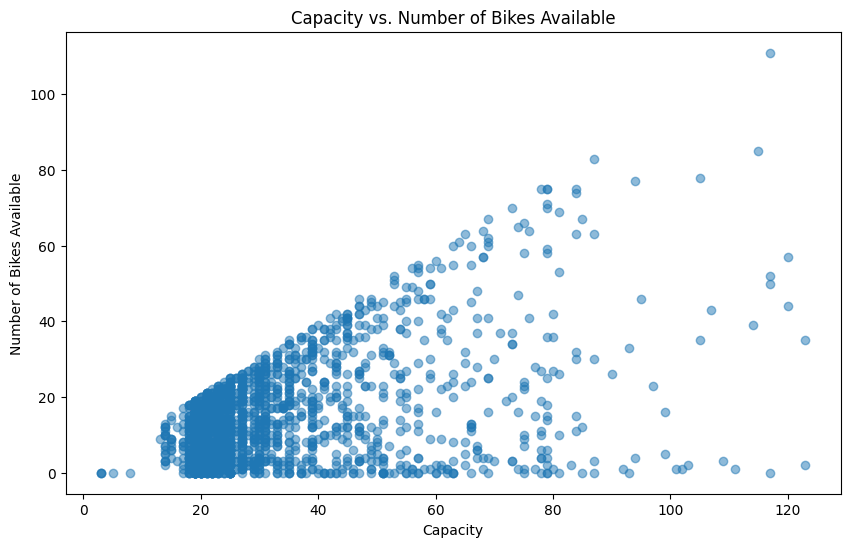

In [81]:
#Graficos de dispersion: capacity vs. num_bikes_available

plt.figure(figsize=(10, 6))
plt.scatter(df['capacity'], df['num_bikes_available'], alpha=0.5)
plt.title('Capacity vs. Number of Bikes Available')
plt.xlabel('Capacity')
plt.ylabel('Number of Bikes Available')
plt.show()


Interpretación:Esta gráfica sugiere que no hay una relación directa y simple entre la capacidad de las estaciones y el número de bicicletas disponibles. Aunque las estaciones con mayor capacidad tienden a tener un rango más amplio de bicicletas disponibles, la cantidad exacta de bicicletas no parece estar fuertemente ligada a la capacidad. Esto podría indicar que otros factores, como la ubicación de la estación, la hora del día, o patrones de uso específicos, son más determinantes en la disponibilidad de bicicletas.

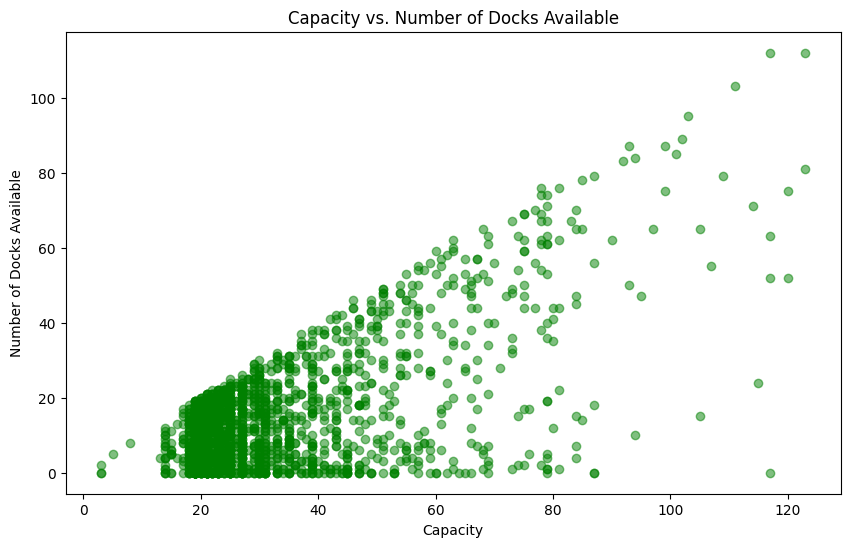

In [82]:
#capacity vs. num_docks_available
plt.figure(figsize=(10, 6))
plt.scatter(df['capacity'], df['num_docks_available'], alpha=0.5, color='green')
plt.title('Capacity vs. Number of Docks Available')
plt.xlabel('Capacity')
plt.ylabel('Number of Docks Available')
plt.show()


Interpretación: Esta gráfica muestra que en general, las estaciones con mayor capacidad tienden a tener más muelles disponibles, lo cual es consistente con lo esperado.

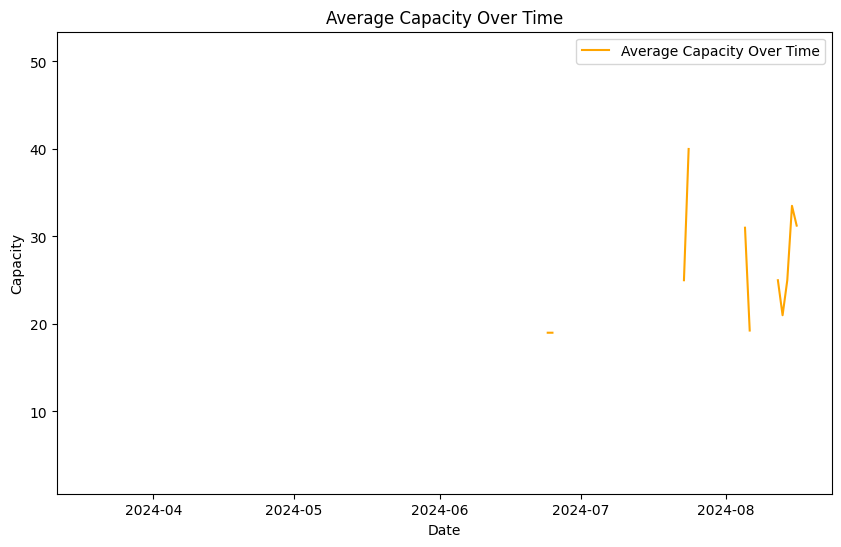

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/cleaned_citybike_stations.csv')

# Asegurarse de que 'last_reported' esté en formato datetime
df['last_reported'] = pd.to_datetime(df['last_reported'], errors='coerce')

# Establecer 'last_reported' como el índice del DataFrame
df.set_index('last_reported', inplace=True)

# Agrupar los datos por día y calcular el promedio de capacidad
capacity_over_time = df['capacity'].resample('D').mean()

# Graficar el comportamiento a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(capacity_over_time, label='Average Capacity Over Time', color='orange')
plt.title('Average Capacity Over Time')
plt.xlabel('Date')
plt.ylabel('Capacity')
plt.legend()
plt.show()


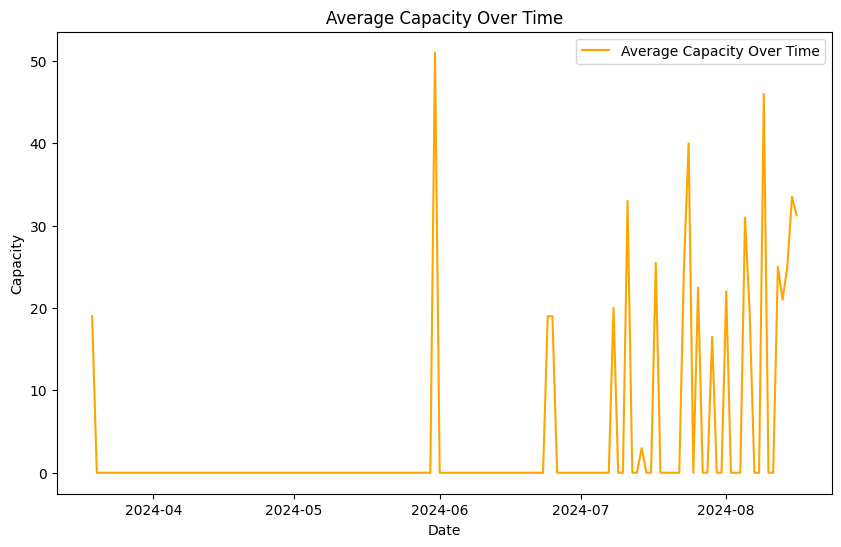

In [84]:
#Visualizar la capacidad promedio de las estaciones de Citi Bike a lo largo del tiempo
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/cleaned_citybike_stations.csv')

# Corroborar que 'last_reported' esté en formato datetime
df['last_reported'] = pd.to_datetime(df['last_reported'], errors='coerce')

# Eliminar filas con fechas inválidas en 'last_reported'
df = df[df['last_reported'].notnull()]

# Establecer 'last_reported' como el índice del DataFrame
df.set_index('last_reported', inplace=True)

# Agrupar los datos por día y calcular el promedio de capacidad
capacity_over_time = df['capacity'].resample('D').mean()

# Rellenar posibles valores faltantes para mejorar la continuidad en la gráfica
capacity_over_time = capacity_over_time.fillna(0)

# Graficar el comportamiento a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(capacity_over_time, label='Average Capacity Over Time', color='orange')
plt.title('Average Capacity Over Time')
plt.xlabel('Date')
plt.ylabel('Capacity')
plt.legend()
plt.show()


Interpretación: La capacidad de las estaciones de Citi Bike varía considerablemente a lo largo del tiempo, lo que sugiere que la disponibilidad de bicicletas no es constante y está sujeta a factores externos como la demanda y las condiciones operativas.

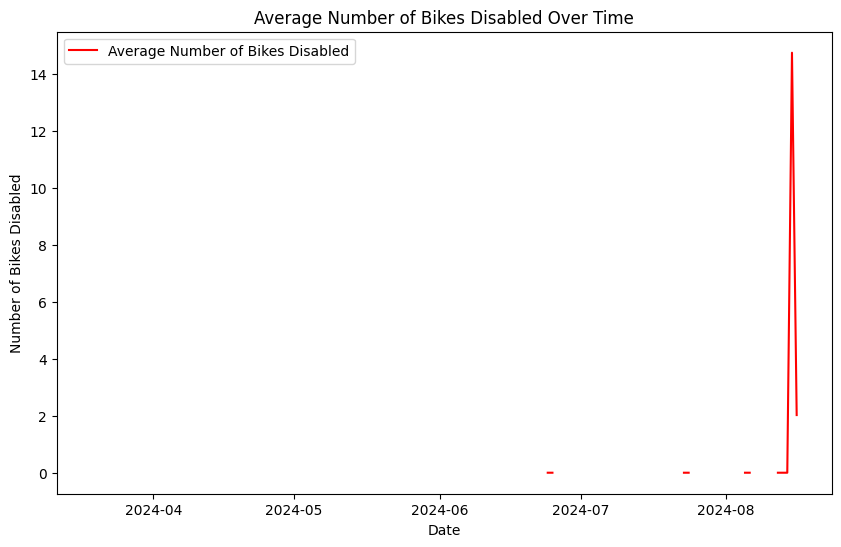

In [85]:
#Visualizar el promedio diario de bicicletas deshabilitadas
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/cleaned_citybike_stations.csv')

# Asegurarse de que 'last_reported' esté en formato datetime
df['last_reported'] = pd.to_datetime(df['last_reported'], errors='coerce')

# Establecer 'last_reported' como el índice del DataFrame
df.set_index('last_reported', inplace=True)

# Agrupar los datos por día y calcular el promedio de bicicletas deshabilitadas
bikes_disabled_over_time = df['num_bikes_disabled'].resample('D').mean()

# Graficar el comportamiento a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(bikes_disabled_over_time, label='Average Number of Bikes Disabled', color='red')
plt.title('Average Number of Bikes Disabled Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Disabled')
plt.legend()
plt.show()


Interpretación: La gráfica muestra un comportamiento inesperado: durante la mayor parte del tiempo, el número promedio de bicicletas deshabilitadas es muy bajo, casi cero, pero hacia el final del período, hay un aumento repentino y significativo.

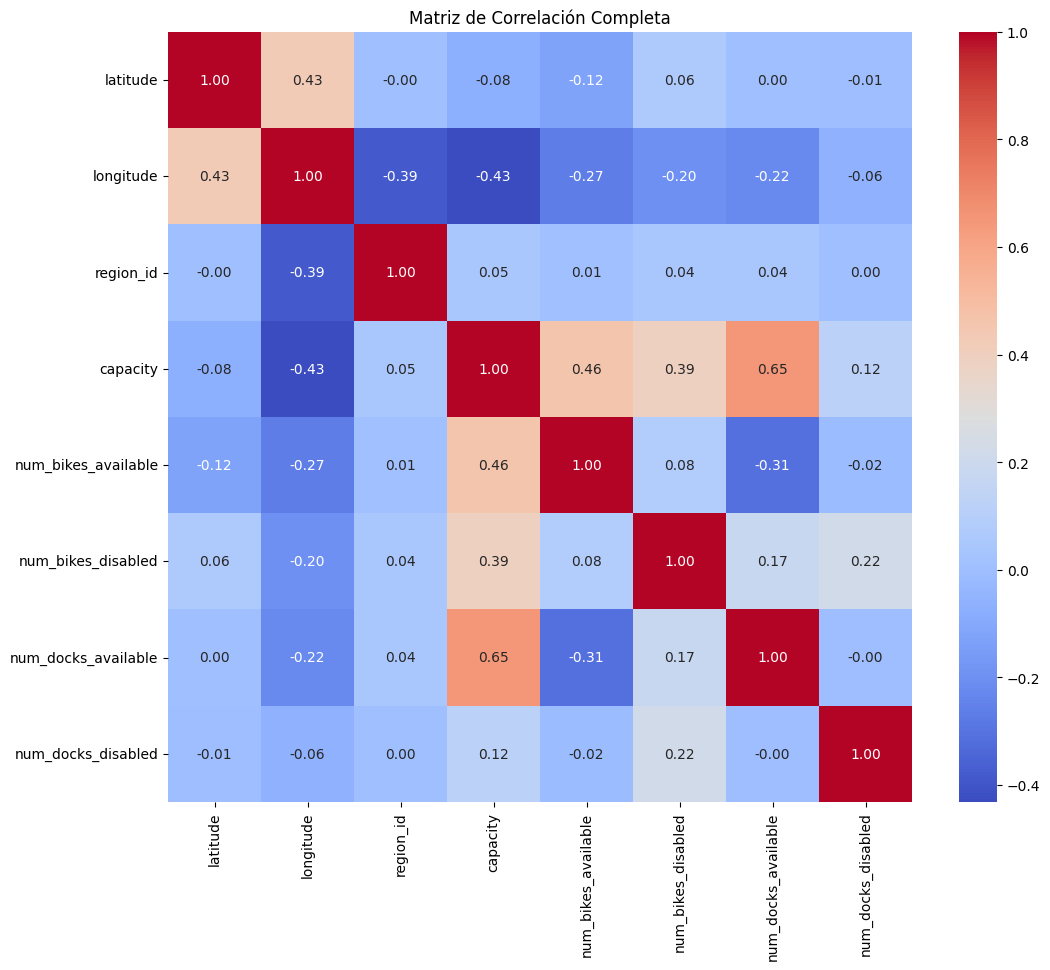

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/cleaned_citybike_stations.csv')

# Seleccionar todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Crear una visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación Completa')
plt.show()
